In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import *
from utilitiesDL import *
from getModFeat import *

/home/byk004/miniconda3/envs/cyclo_modul_OFDM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
dataLen = 100000
nSource = 10
SNRList = range(5, 51, 5)
modList = [4, 16, 64, 256, 1024]
fileIndexList = range(1, 6, 1)
# modList = [256, 1024]

USRPoutputDir = '/project/iarpa/byungjun/cyclo_modul_OFDM/USRPoutput/NRDLa_Normal/'
for mod in modList:
    if mod == 2:
        modName = 'bpsk'
    elif mod == 4:
        modName = 'qpsk'
    elif mod == 16:
        modName = '16qam'
    elif mod == 64:
        modName = '64qam'
    elif mod == 256:
        modName = '256qam'
    elif mod == 1024:
        modName = '1024qam'

    for SNR in SNRList:
        for fileIndex in fileIndexList:
            filePrefix = 'NRDLa_Normal_' + str(mod) + '_0_' + str(SNR) + '_20_125_' 
            print(filePrefix + str(fileIndex))
            filename = filePrefix + str(fileIndex) + '.iq'
            samples = np.fromfile(USRPoutputDir + filename, np.complex64)
            for iSource in range(nSource):
                if np.where(np.abs(samples) > 0.08)[0].shape[0] == 0:
                    break
                firstIndex = np.where(np.abs(samples) > 0.08)[0][0]
                samplesSource = samples[firstIndex : firstIndex+dataLen]
                samplesSource.astype(np.complex64)
                samplesSource.tofile('/project/iarpa/byungjun/cyclo_modul_OFDM/realData/NRDL/NRDLa_Normal_' + modName  + '/' + \
                        filePrefix + str((fileIndex-1)*10 + iSource+1) + '.iq')
                samples = samples[firstIndex+int(1.5*dataLen):]

NRDLc_Normal_4_0_5_20_125_1
NRDLc_Normal_4_0_5_20_125_2
NRDLc_Normal_4_0_5_20_125_3
NRDLc_Normal_4_0_5_20_125_4
NRDLc_Normal_4_0_5_20_125_5
NRDLc_Normal_4_0_10_20_125_1
NRDLc_Normal_4_0_10_20_125_2
NRDLc_Normal_4_0_10_20_125_3
NRDLc_Normal_4_0_10_20_125_4
NRDLc_Normal_4_0_10_20_125_5
NRDLc_Normal_4_0_15_20_125_1
NRDLc_Normal_4_0_15_20_125_2
NRDLc_Normal_4_0_15_20_125_3
NRDLc_Normal_4_0_15_20_125_4
NRDLc_Normal_4_0_15_20_125_5
NRDLc_Normal_4_0_20_20_125_1
NRDLc_Normal_4_0_20_20_125_2
NRDLc_Normal_4_0_20_20_125_3
NRDLc_Normal_4_0_20_20_125_4
NRDLc_Normal_4_0_20_20_125_5
NRDLc_Normal_4_0_25_20_125_1
NRDLc_Normal_4_0_25_20_125_2
NRDLc_Normal_4_0_25_20_125_3
NRDLc_Normal_4_0_25_20_125_4
NRDLc_Normal_4_0_25_20_125_5
NRDLc_Normal_4_0_30_20_125_1
NRDLc_Normal_4_0_30_20_125_2
NRDLc_Normal_4_0_30_20_125_3
NRDLc_Normal_4_0_30_20_125_4
NRDLc_Normal_4_0_30_20_125_5
NRDLc_Normal_4_0_35_20_125_1
NRDLc_Normal_4_0_35_20_125_2
NRDLc_Normal_4_0_35_20_125_3
NRDLc_Normal_4_0_35_20_125_4
NRDLc_Normal_4_0_35

(3200000,)
0 2025026 0
1 50220 2225026
2 49754 2475246
3 50119 2725000
4 49791 2975119
5 50255 3224910
6 break []


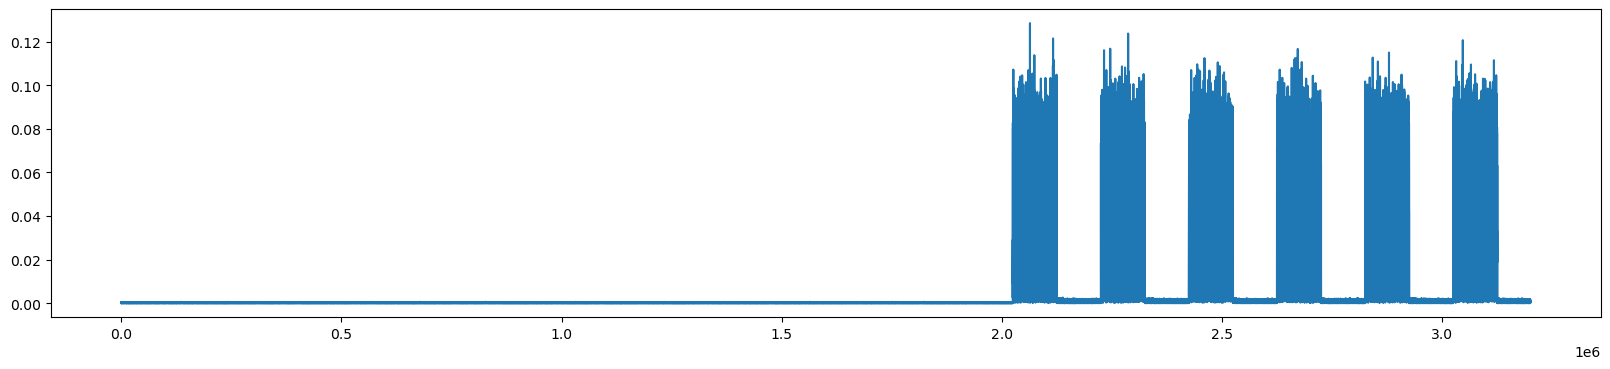

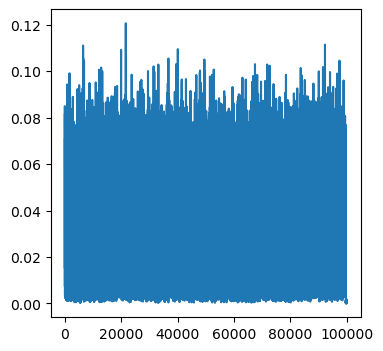

In [7]:
samples = np.fromfile('/project/iarpa/byungjun/cyclo_modul_OFDM/USRPoutput/NRDLb_Normal/NRDLb_Normal_16_0_25_20_125_5.iq', np.complex64)
print(samples.shape)
# samples = np.fromfile(USRPoutputDir + filename, np.complex64)
# firstIndex = np.where(np.abs(loadedSamples) > 0.05)[0][0]
plt.figure(figsize=(20,4))
plt.plot(np.abs(samples))
# samples = loadedSamples[firstIndex:]
dataLen = 100000
fileIndex = 1
cumulFirstIndex = 0

for iSource in range(10):
    if np.where(np.abs(samples) > 0.08)[0].shape[0] == 0:
        print(iSource, 'break', np.where(np.abs(samples) > 0.15)[0])
        break
    firstIndex = np.where(np.abs(samples) > 0.08)[0][0]
    print(iSource, firstIndex, cumulFirstIndex)

    samplesSource = samples[firstIndex : firstIndex+dataLen]
    # samplesSource.astype(np.complex64)
    # samplesSource.tofile('/project/iarpa/byungjun/cyclo_modul_OFDM/realData/NRDL/NRDLb_Normal_16qam/' + \
    #         'NRDLb-Normal_16_0_35_20_125_' + str((fileIndex-1)*10 + iSource+1) + '.iq')
    # firstIndex = firstIndex + 2*dataLen
    cumulFirstIndex = cumulFirstIndex + firstIndex+2*dataLen
    samples = samples[firstIndex+int(1.5*dataLen):]
    # if iSource == 9:
    #     break

plt.figure(figsize=(4,4))
plt.plot(np.abs(samplesSource))


In [4]:
loadedSeq = np.fromfile('/project/iarpa/byungjun/cyclo_modul_OFDM/realData/NRDL/NRDLb_Normal_16_0_35_20_125_1.iq', np.complex64)

FileNotFoundError: [Errno 2] No such file or directory: '/project/iarpa/byungjun/cyclo_modul_OFDM/realData/NRDL/NRDLb_Normal_16_0_35_20_125_1.iq'

In [5]:
filePrefix

NameError: name 'filePrefix' is not defined